In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
adam_lr = tf.keras.optimizers.Adam(learning_rate = .01)
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import recall_score , precision_score ,f1_score , accuracy_score

In [2]:
print(tf.__version__)

2.12.0


In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


> # **Feature engineering**






In [6]:
# feature selection
df = df.drop(columns = df.columns[0:3] , axis =1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# categorical encoding
df = pd.get_dummies(df , columns=['Geography' , 'Gender'] , drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
# splitting data for feature scaling and model training
x = df.drop(columns = ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = .3 , random_state = 42)

In [17]:
# feature scaling : using standard scaler as we will use feed forward neural network
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

> # Model Building
since it is a simple binary classification problem , we will use :-
1.  model ▶ sequential [which is a linear stack of layers.]
2. hidden layer activation function ▶ RELU
3. output layer activation function ▶ sigmoid
4. optimizer ▶ adam
5. loss function ▶ binary cross entropy


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

### for forward propagation



In [22]:
# create model object
nn = Sequential()

In [24]:
# create the input layer with 11 neuron
nn.add(Dense(units=11 , activation = 'relu'))

In [25]:
# create the first hidden layer with 5 neurons
nn.add(Dense(units=5 , activation = 'relu'))

In [26]:
# create the second hidden layer with 3 neurons
nn.add(Dense(units=3 , activation = 'relu'))

In [27]:
# create the output layer with 1 neuron and sigmoid activation function
nn.add(Dense(units=1 , activation = 'sigmoid'))

### for backward propagation


In [30]:
nn.compile(optimizer = adam_lr , loss = 'binary_crossentropy' , metrics = 'acc')

In [31]:
# early stopping so the training stops when the accuracy is not increasing
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# model training

In [33]:
nn_evolution = nn.fit(xtrain , ytrain , batch_size = 10 , epochs = 1000 , callbacks= early_stop , validation_split = .3)

Epoch 1/1000
490/490 [==============================] - 2s 5ms/step - loss: 0.3336 - acc: 0.8590 - val_loss: 0.3705 - val_acc: 0.8433
Epoch 2/1000
490/490 [==============================] - 2s 5ms/step - loss: 0.3313 - acc: 0.8627 - val_loss: 0.3737 - val_acc: 0.8462
Epoch 3/1000
490/490 [==============================] - 2s 4ms/step - loss: 0.3333 - acc: 0.8620 - val_loss: 0.3639 - val_acc: 0.8490
Epoch 4/1000
490/490 [==============================] - 2s 4ms/step - loss: 0.3318 - acc: 0.8596 - val_loss: 0.3631 - val_acc: 0.8405
Epoch 5/1000
490/490 [==============================] - 2s 4ms/step - loss: 0.3287 - acc: 0.8629 - val_loss: 0.3606 - val_acc: 0.8533
Epoch 6/1000
490/490 [==============================] - 2s 4ms/step - loss: 0.3305 - acc: 0.8600 - val_loss: 0.3649 - val_acc: 0.8495
Epoch 7/1000
490/490 [==============================] - 3s 5ms/step - loss: 0.3301 - acc: 0.8629 - val_loss: 0.3594 - val_acc: 0.8457
Epoch 8/1000
490/490 [==============================] - 2s 4ms

### stopped at epoch 26

In [41]:
ypred = nn.predict(xtest)
ypred = (ypred >= .5)

94/94 [==============================] - 0s 4ms/step


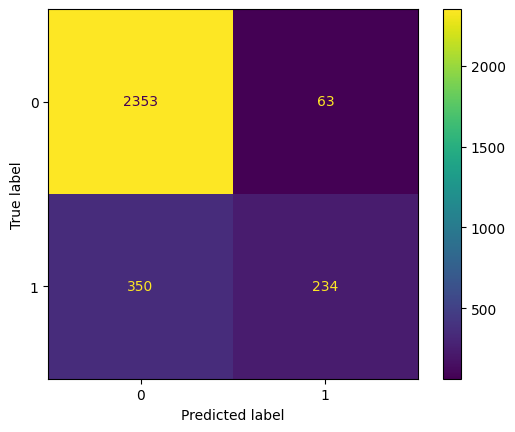

In [45]:
cm = confusion_matrix(ytest , ypred)
dis = ConfusionMatrixDisplay(confusion_matrix = cm )
dis.plot()

In [47]:
sensitivity = recall_score(ytest , ypred)
f1 = f1_score(ytest , ypred)
precision = precision_score(ytest , ypred)
accuracy = accuracy_score(ytest , ypred)


print({"recall":sensitivity,"Precision":precision ,"f1 score" :f1 , "accuracy" :accuracy})

{'recall': 0.4006849315068493, 'Precision': 0.7878787878787878, 'f1 score': 0.5312145289443814, 'accuracy': 0.8623333333333333}
